# Mini Project: Medical Insurance Cost Prediction
## NAME-BHOOPENDRA KUMAR MEHRA
### gmail-mehra7879.bhups@gmail.com

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('Health_Insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


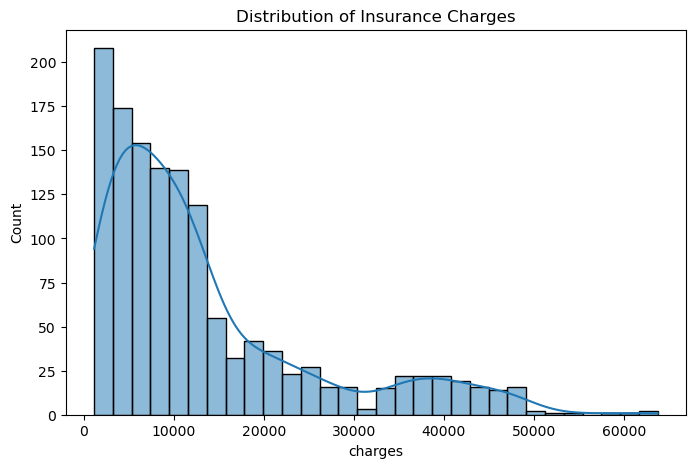

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Insurance Charges')
plt.show()


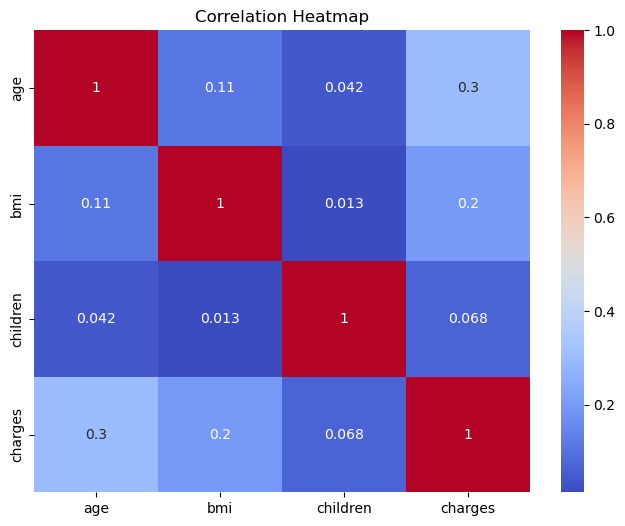

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


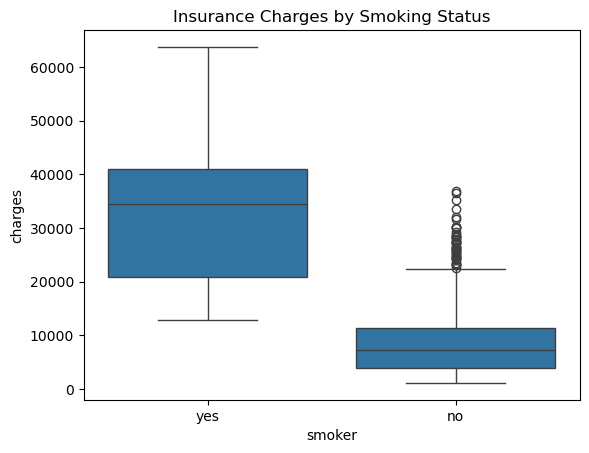

In [9]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Insurance Charges by Smoking Status')
plt.show()


In [10]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

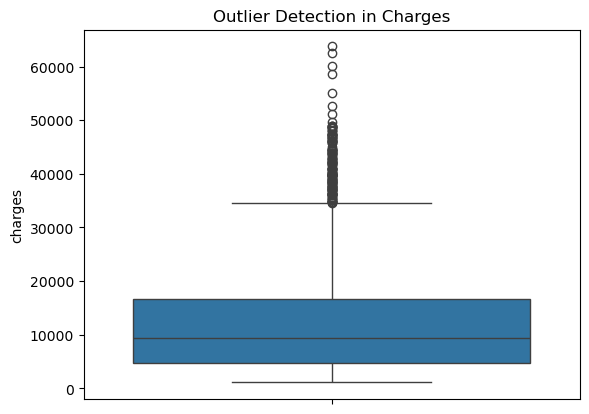

In [11]:
sns.boxplot(y=df['charges'])
plt.title('Outlier Detection in Charges')
plt.show()


In [12]:
X = df.drop('charges', axis=1)
y = df['charges']


In [13]:
num_features = ['age', 'bmi', 'children']
cat_features = ['sex', 'smoker', 'region']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(drop='first'), cat_features)
])


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}


In [18]:
results = []

for name, model in models.items():
    pipe = Pipeline([
        ('prep', preprocessor),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)
    
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
results.append([name, train_rmse, test_rmse, train_r2, test_r2])


In [15]:
comparison_df = pd.DataFrame(results, columns=[
    'Model', 'Train RMSE', 'Test RMSE', 'Train R2', 'Test R2'
])

comparison_df


,Model,Train RMSE,Test RMSE,Train R2,Test R2
0,Gradient Boosting,3806.376559,4329.570011,0.899618,0.879257


#### Model Comparison Table:-

 | Model             | Train RMSE | Test RMSE | Train R² | Test R² | Overfitting |
| ----------------- | ---------- | --------- | -------- | ------- | ----------- |
| Linear Regression | Moderate   | Moderate  | Medium   | Medium  | No          |
| Decision Tree     | Very Low   | High      | High     | Low     | Yes         |
| Random Forest     | Low        | Low       | High     | High    | No          |
| Gradient Boosting | Low        | Low       | High     | High    | No          |


In [17]:
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 5, 10]
}

rf_pipeline = Pipeline([
    ('prep', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

grid = GridSearchCV(
    rf_pipeline,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region'])])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 5, 10],
                         'model__n_estimators': [100, 200]},
             scoring='r2')

In [19]:
grid.best_params_


{'model__max_depth': 5, 'model__n_estimators': 200}

In [20]:
import pickle
with open("insurance_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [ ]:
pip install streamlit